# Finding Heavy Traffic Indicators on I-94
In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of this project is to determine a few indicators of heavy traffic on I-94.  These indicators will range from weather types and times of the day/week.  

The dataset was made available from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

### Importing and Reading the dataset

In [1]:
# Importing Pandas to use on the dataset.
import pandas as pd
# Importing Matplotlib to help generate plots.
import matplotlib.pyplot as plt
# Reading in the data set and assign it to the variable: traffic.
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Above we can see the first five and last five rows, as well as info, about the dataset.  There are 48,203 rows and 10 columns.  The descriptions of what the columns mean will help introduce what is being described in this dataset:
- holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair.
- temp: Numeric Average temp in Kelvin.
- rain_1h: Numeric Amount in mm of rain that occurred in the hour.
- snow_1h: Numeric Amount in mm of snow that occurred in the hour.
- clouds_all: Numeric Percentage of cloud cover.
- weather_main: Categorical Short textual description of the current weather.
- weather_description: Categorical Longer textual description of the current weather.
- date_time: DateTime Hour of the data collected in local CST time.
- traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume.

### Analyzing Traffic Volume

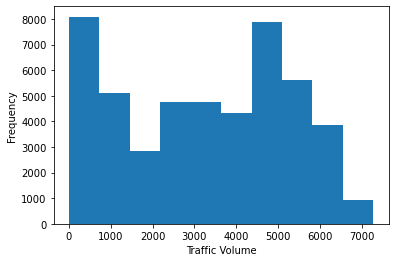

In [5]:
# Importing matplotlib so we can generate graphs.
import matplotlib.pyplot as plt
%matplotlib inline

# Generating a histogram for the 'traffic_volumn' column using a Pandas method.
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [6]:
# Using the '.describe()' method to look up some stats about the 'traffic_volume' column.
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

This dataset shows a specific section of westbound traffic from October 2, 2012 at 9am to September 30, 2018 at 11pm CST.  The histogram shows that traffic volumes between 0-1000 and 4500-5100 have the highest frequencies.  The average traffic volume is about 3300 and the max traffic volume is 7280.

Before looking at how daytime and nighttime influence traffic volume, I would believe that these times would effect traffic volume.  The histogram, as previously noted, shows a spike in traffic volume between 0-1000 and 4500-5100.  I am assuming that the low traffic volume spike is around afternoon and late night times while the high traffic spike is during the morning commute and evening rush hour after work

### Traffic Volume: Day vs. Night

We will divide the dataset into two parts, this will give us a good starting point to look at day and night differences:
- Daytime data: hours from 7am to 7pm, or 07:00 to 19:00
- Nighttime data: hours from 7pm to 7am, or 19:00 to 07:00

In [7]:
# Splitting the dataset into daytime and nighttime.
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

daytime = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <= 19)]
print(daytime.shape)
nighttime = traffic[(traffic['date_time'].dt.hour > 19) | (traffic['date_time'].dt.hour < 7)]
print(nighttime.shape)

(25838, 9)
(22366, 9)


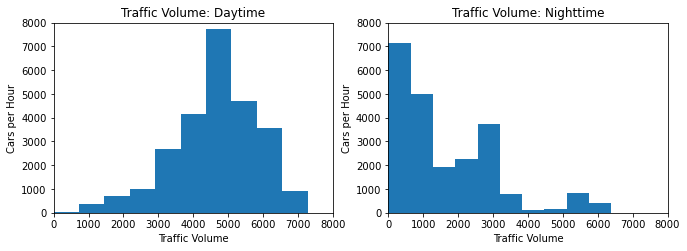

In [8]:
# Creating two histograms side-by-side in a grid chart to make it easier to compare.
plt.figure(figsize=(11,3.5))
# The first histogram.
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.title('Traffic Volume: Daytime')
plt.ylabel('Cars per Hour')
plt.xlabel('Traffic Volume')

# The second histogram.
plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.title('Traffic Volume: Nighttime')
plt.ylabel('Cars per Hour')
plt.xlabel('Traffic Volume')

plt.show()

In [9]:
print("Daytime Traffic Stats:\n",daytime['traffic_volume'].describe())
print('\n')
print("Nighttime Traffic Stats:\n",nighttime['traffic_volume'].describe())

Daytime Traffic Stats:
 count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Nighttime Traffic Stats:
 count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64


Above, two traffic volume histograms were generated, one for the daytime hours and the other for nighttime hours.  The two graphs show opposing distributions.  The daytime graph is skewed towards the right, the nighttime graph is skewed to the left.  This means the frequency of dense traffic happens much more in the daytime than nighttime.  The statistics show that the mean traffic density in the daytime is about 2.5 times higher than the nighttime.  

Since the traffic is very light at night and our goal is to find indicators of heavy traffic, I believe we should not use the nighttime data.  It is a very rare instance for dense traffic to take place at night.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day


###  - Month

In [10]:
# Creating a new column where each value describes the month when the traffic volume measurement was taken.
# Then grouping the dataset by the 'month' column with the mean as an aggregate function.
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-10-b27826b7ea39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['month'] = daytime['date_time'].dt.month


month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

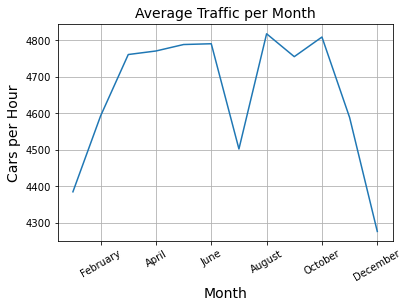

In [11]:
# Creating the line plot.
plt.plot(by_month['traffic_volume'])
plt.title('Average Traffic per Month',fontsize=14)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Cars per Hour',fontsize=14)
plt.xticks(ticks=[2,4,6,8,10,12],
          labels=['February','April','June','August','October','December'],
          rotation=30)
plt.grid()
plt.show()

Above, we have printed out a list of the average traffic per month in this dataset.  The list shows every month has at least 4000 cars per hour, making it seem like a flat line with not much change per month.

To visualize this list, we generated a line plot and it shows a different pattern.  The line plot shows low traffic from about November to January, after January, traffic dramatically rises.  Then from March to October there is a fairly high level of traffic except for a deep drop in July.  

Certain months definitely effect traffic density, most likely due to weather and holidays.  The months with the highest traffic are during the summer months when it is not very cold, there are also summer vacation where families are more likely taking road trips.  

### - Day of the week

In [12]:
# Same process as above for the 'month' column, now with 'dayofweek' column.
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-12-687248ad186b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['dayofweek'] = daytime['date_time'].dt.dayofweek


dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

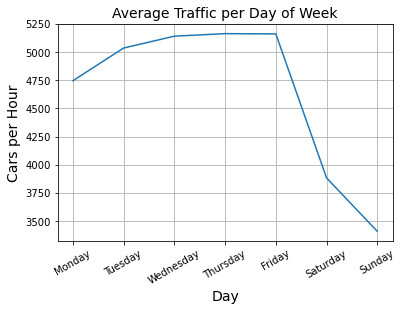

In [13]:
# Creating the line plot.
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Average Traffic per Day of Week',fontsize=14)
plt.xlabel('Day',fontsize=14)
plt.ylabel('Cars per Hour',fontsize=14)
plt.xticks(ticks=[0,1,2,3,4,5,6],
          labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
          rotation=30)
plt.grid()
plt.show()

The line plot shows that during the work week, traffic is consistently high.  After Friday the traffic takes a steep drop to Saturday and falls even lower on Sunday.  Since most people need to drive to work during the work week, it does not fluctuate.  When people are not working, it is not necessary for as many for people to drive as consistently.

### - Time of day

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [14]:
# Splitting the data based on business day or weekend.
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
print("Business day hours:\n",by_hour_business['traffic_volume'])
print("Weekend hours:\n",by_hour_weekend['traffic_volume'])

Business day hours:
 hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
Weekend hours:
 hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-14-03742d8b4ca7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['hour'] = daytime['date_time'].dt.hour


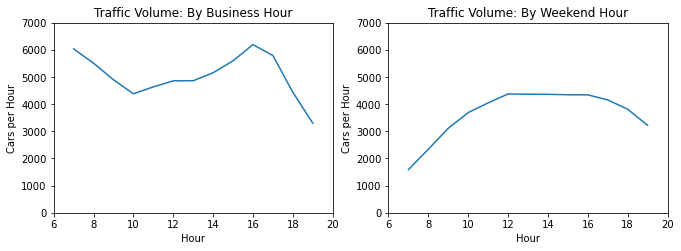

In [15]:
# Creating two histograms side-by-side in a grid chart to make it easier to compare.
plt.figure(figsize=(11,3.5))
# The first histogram.
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(6,20)
plt.ylim(0,7000)
plt.title('Traffic Volume: By Business Hour')
plt.ylabel('Cars per Hour')
plt.xlabel('Hour')

# The second histogram.
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(6,20)
plt.ylim(0,7000)
plt.title('Traffic Volume: By Weekend Hour')
plt.ylabel('Cars per Hour')
plt.xlabel('Hour')

plt.show()

We generated two line plots showing the average traffic volume during hours on business days (Monday to Friday) and the weekend (Saturday + Sunday).  The two plots have the same the x- and y-ranges so you can see the differences easily.  Overall, average traffic density during business days is much higher than on the weekends.  Peak traffic during business hours is 6189 cars per hour at 16:00/4:00pm, peak traffic during weekend hours is 4372 cars per hour at 12:00/12:00pm.  

Each line plot shows a different pattern.  Traffic volume during business hours peaks at 7 in the morning with 6030 cars per hour, wanes down to 4378, peaks again with 6189, and finally dips all that way to 3298.  This is most likely due to people driving to work in the morning and eventually leaving work to go home.

Traffic volume during weekend hours starts with 1589 cars per hour at 07:00/7:00pm and peaks at 4372 at 12:00.  The traffic density stays relatively consistent until 18:00/6:00pm, staying above 4000 cars per hour.  Then density decreases as the day ends.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description'.

We will find the correlation between the numerical weather columns and 'traffic_volume'.

In [16]:
daytime.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

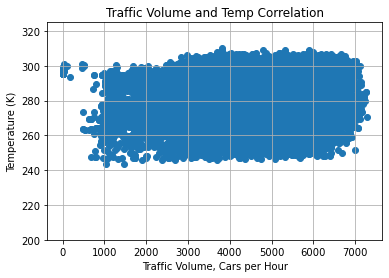

In [17]:
# Generating a scatter plot.
plt.scatter(daytime['traffic_volume'],daytime['temp'])
plt.title('Traffic Volume and Temp Correlation')
plt.xlabel('Traffic Volume: Cars per Hour')
plt.ylabel('Temperature (K)')
plt.ylim(200,325)
plt.grid()
plt.show()

Although temperature and traffic volume have the strongest correlation of all the numerical weather columns, the scatter plot shows that this is not a reliable indicator for heavy traffic.

It is not a reliable indicator because one degree K will not give you an idea of how heavy traffic might be, per the scatter plot.

## Weather Types

To see if we can find more useful data, we'll look next at the categorical weather-related columns: 'weather_main' and 'weather_description'.  We're going to calculate the average traffic volume associated with each unique value in these two columns.

In [18]:
# Calculating the average traffic volume associated with each unique 
# value in these two columns.
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

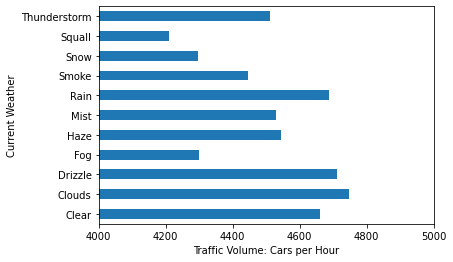

In [34]:
# Plotting the first horizontal bar plot.
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume: Cars per Hour')
plt.ylabel('Current Weather')
plt.xlim(4000,5000)
plt.show()

None of the weather events create heavier traffic than about 4750 cars per hour.  The main weather types that are the best heavy traffic indicators are clouds, drizzle, and rain.  Clear weather is also a heavy traffic indicator, which shows that weather types may not necessarily indicate heavy traffic.

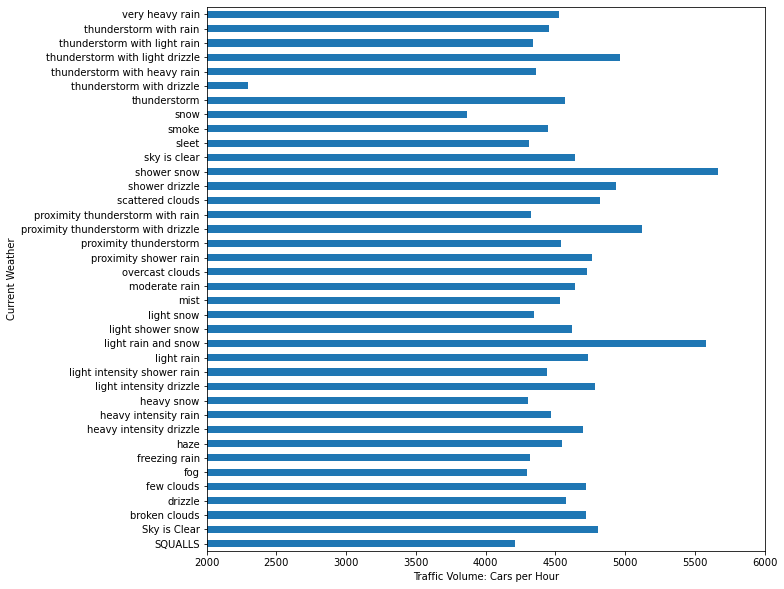

In [54]:
# Plotting the second horizontal bar plot.
plt.figure(figsize=(10,10))
by_weather_description['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume: Cars per Hour')
plt.ylabel('Current Weather')
plt.xlim(2000,6000)
plt.show()

There are 3 weather types that create heavier traffic than 5000 cars per hour: 'shower snow', 'proximity thunderstorm with rain', and 'light rain and show'.  The rest of the weather types are between 4000 and 5000.  

It is tough to find clear heavy traffic indicators from weather types when most of them show that they cause about the same amount of traffic.  

# Conclusion

The goal of the project was to look for indicators of heavy traffic.

When we looked at day vs night, there was a stark difference in heavy traffic.  Therefore we took out the night time data and looked closer to the day time data.

Within the day time data, we looked at 1.  Time Indicators and 2.  Weather Indicators:
- The first time indicator, month, showed that from about November to February there is little traffic.  From March to October there is significantly more traffic.
- The second time indicator, day of the week, from Monday to Friday there is significantly more traffic than Saturday and Sunday.
- In the third time indicator, time of day, we split the time of day to find the averages of each hour within business days and weekend days.  Business hours showed two major spikes in the morning and then the evening.  The weekend hours showed rising traffic in the morning and flattening out for most of the day.  Business hours had much heavier traffic overall compared to weekend hours.

Within weather indicators we looked for the strongest correlation between traffic volume and all the numeric weather columns.  Temperature had the strongest correlation but the scatter plot showed that this was not a reliable heavy traffic indicator.  We looked closer at the categorical weather-related columns.  Much like temperature, the categorical weather-related columns were not reliable heavy traffic indicators.  Most of these columns caused a similar amount of traffic, you cannot use that data to predict how heavy traffic would be.